In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# Connect to DB
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
newdate = dt.datetime(2017, 8, 23) - dt.timedelta(days=365)
precip = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= newdate).all()
for row in precip:
    print(row)

('2016-08-24', 0.08)
('2016-08-25', 0.08)
('2016-08-26', 0.0)
('2016-08-27', 0.0)
('2016-08-28', 0.01)
('2016-08-29', 0.0)
('2016-08-30', 0.0)
('2016-08-31', 0.13)
('2016-09-01', 0.0)
('2016-09-02', 0.0)
('2016-09-03', 0.0)
('2016-09-04', 0.03)
('2016-09-05', None)
('2016-09-06', None)
('2016-09-07', 0.05)
('2016-09-08', 0.0)
('2016-09-09', 0.03)
('2016-09-10', 0.0)
('2016-09-11', 0.05)
('2016-09-12', 0.0)
('2016-09-13', 0.02)
('2016-09-14', 1.32)
('2016-09-15', 0.42)
('2016-09-16', 0.06)
('2016-09-17', 0.05)
('2016-09-18', 0.0)
('2016-09-19', 0.0)
('2016-09-20', 0.0)
('2016-09-21', 0.0)
('2016-09-22', 0.02)
('2016-09-23', 0.0)
('2016-09-24', 0.0)
('2016-09-25', 0.0)
('2016-09-26', 0.06)
('2016-09-27', 0.02)
('2016-09-28', 0.0)
('2016-09-29', 0.0)
('2016-09-30', 0.0)
('2016-10-01', 0.0)
('2016-10-02', 0.0)
('2016-10-03', 0.0)
('2016-10-04', 0.0)
('2016-10-05', 0.0)
('2016-10-06', 0.0)
('2016-10-07', 0.0)
('2016-10-08', 0.0)
('2016-10-09', 0.0)
('2016-10-10', 0.0)
('2016-10-11', 0.0)
('

In [11]:
# Convert precip query to a dataframe and drop NaN values.
precip_df = pd.DataFrame(precip).dropna(0)
precip_df.sort_values(by=['date'])
precip_df.head()

,date,prcp
0,2016-08-24,0.08
1,2016-08-25,0.08
2,2016-08-26,0.00
3,2016-08-27,0.00
4,2016-08-28,0.01


In [12]:
#precip_df.set_index(["date"], inplace=True)
#precip_df.sort_values(by=['date'])
#precip_df.head()

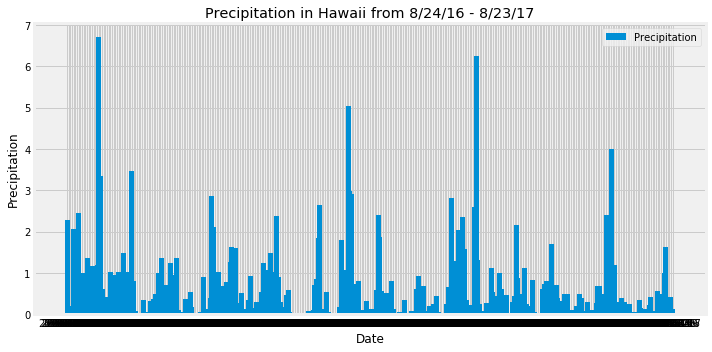

In [13]:
#precip_df.set_index(precip_df["date"], inplace=True)
#precip_df.sort_values(by=['date'])
#precip_df.reset_index(drop=True)

# Create the figure 
plt.figure(figsize=(10,5))
plt.bar(precip_df.date, precip_df.prcp, width = 3, label="Precipitation")
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.title("Precipitation in Hawaii from 8/24/16 - 8/23/17")
plt.legend(loc='best')
plt.tight_layout()
#plt.grid()
plt.savefig('hiprecip.png')
plt.show()

In [14]:
#Set dataframe index to date and calculate count, mean, min, max, etc.
precip_df.set_index(["date"], inplace=True)
precip_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [15]:
# Design a query to show how many stations are available in this dataset?
stations = session.query(Station.station).count()
print(stations)

9


In [16]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.date)).\
    order_by(func.count(Measurement.date).desc()).group_by(Measurement.station).all()

for row in active_stations:
    print(row)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [17]:
# Using the station id, calculate the lowest temperature recorded at each station.
low_temps = session.query(Measurement.station, Measurement.tobs).\
    order_by(func.min(Measurement.tobs)).group_by(Measurement.station).all()

low_temps

[('USC00511918', 53.0),
 ('USC00519281', 54.0),
 ('USC00519397', 56.0),
 ('USC00519523', 56.0),
 ('USC00514830', 58.0),
 ('USC00516128', 58.0),
 ('USC00517948', 58.0),
 ('USC00518838', 58.0),
 ('USC00513117', 59.0)]

In [18]:
# Using the station id, calculate the highest temperature recorded at each station.
high_temps = session.query(Measurement.station, Measurement.tobs).\
    order_by(func.max(Measurement.tobs)).group_by(Measurement.station).all()

high_temps

[('USC00518838', 83.0),
 ('USC00516128', 84.0),
 ('USC00513117', 85.0),
 ('USC00514830', 85.0),
 ('USC00519281', 85.0),
 ('USC00519523', 85.0),
 ('USC00511918', 87.0),
 ('USC00517948', 87.0),
 ('USC00519397', 87.0)]

In [19]:
# Using the station id, calculate the average temperature recorded at each station.
average_temps = session.query(Measurement.station, Measurement.tobs).\
    order_by(func.avg(Measurement.tobs)).group_by(Measurement.station).all()
average_temps

[('USC00516128', 73.0),
 ('USC00511918', 66.0),
 ('USC00519281', 70.0),
 ('USC00513117', 67.0),
 ('USC00518838', 72.0),
 ('USC00519523', 75.0),
 ('USC00519397', 65.0),
 ('USC00517948', 75.0),
 ('USC00514830', 67.0)]

In [20]:
# Choose the station with the highest number of temperature observations.
top_station = session.query(Measurement.station, func.count(Measurement.date)).\
    order_by(func.count(Measurement.date).desc()).group_by(Measurement.station).first()
top_station

('USC00519281', 2772)

In [21]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
date = dt.datetime(2017, 8, 23) - dt.timedelta(days=365)
station_date = session.query(Measurement.station, Measurement.date, Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').filter(Measurement.date >= date).all()
for row in station_date:
    print(row)

('USC00519281', '2016-08-24', 77.0)
('USC00519281', '2016-08-25', 80.0)
('USC00519281', '2016-08-26', 80.0)
('USC00519281', '2016-08-27', 75.0)
('USC00519281', '2016-08-28', 73.0)
('USC00519281', '2016-08-29', 78.0)
('USC00519281', '2016-08-30', 77.0)
('USC00519281', '2016-08-31', 78.0)
('USC00519281', '2016-09-01', 80.0)
('USC00519281', '2016-09-02', 80.0)
('USC00519281', '2016-09-03', 78.0)
('USC00519281', '2016-09-04', 78.0)
('USC00519281', '2016-09-05', 78.0)
('USC00519281', '2016-09-06', 73.0)
('USC00519281', '2016-09-07', 74.0)
('USC00519281', '2016-09-08', 80.0)
('USC00519281', '2016-09-09', 79.0)
('USC00519281', '2016-09-10', 77.0)
('USC00519281', '2016-09-11', 80.0)
('USC00519281', '2016-09-12', 76.0)
('USC00519281', '2016-09-13', 79.0)
('USC00519281', '2016-09-14', 75.0)
('USC00519281', '2016-09-15', 79.0)
('USC00519281', '2016-09-16', 78.0)
('USC00519281', '2016-09-17', 79.0)
('USC00519281', '2016-09-18', 78.0)
('USC00519281', '2016-09-19', 78.0)
('USC00519281', '2016-09-20'

In [22]:
# Convert previous query to a dateframe, drop NaN values and sort by date.
stationtobs_df = pd.DataFrame(station_date).dropna(0)
stationtobs_df.sort_values(by=['date'])
stationtobs_df.head()

,station,date,tobs
0,USC00519281,2016-08-24,77.0
1,USC00519281,2016-08-25,80.0
2,USC00519281,2016-08-26,80.0
3,USC00519281,2016-08-27,75.0
4,USC00519281,2016-08-28,73.0


In [23]:
#stationtobs_df.info()

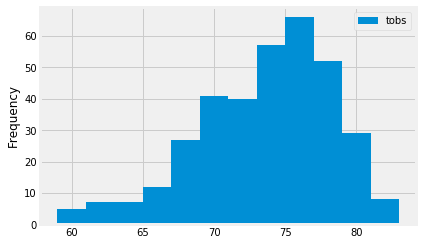

In [24]:
#Create a histogram plot of temperatures from the previous query.
x = stationtobs_df.tobs
plt.hist(x, bins=12, label="tobs") #1 bin for each month of the year
plt.legend(loc="best")
plt.ylabel("Frequency")
plt.savefig("tobs.png")
plt.show();


In [25]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
#def calc_temps(start_date, end_date):
#    """TMIN, TAVG, and TMAX for a list of dates.
#    
#    Args:
#        start_date (string): A date string in the format %Y-%m-%d
#        end_date (string): A date string in the format %Y-%m-%d
#        
#    Returns:
#        TMIN, TAVE, and TMAX
#    """
    
#    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
#        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
#print(calc_temps('2012-02-28', '2012-03-05'))

In [26]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
def calc_temps(start_date, end_date):
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2016-08-24', '2016-09-07'))

[(71.0, 78.03225806451613, 84.0)]


In [27]:
#Convert calc_temps to a dataframe
calc_temps = [(71.0, 78.03225806451613, 84.0)]
calc_temps_df = pd.DataFrame(calc_temps)
calc_temps_df

,0,1,2
0,71.0,78.032258,84.0


In [28]:
#Calculate error bar value (tmax-tmin)
terr = calc_temps_df[2] - calc_temps_df[0]
terr

0    13.0
dtype: float64

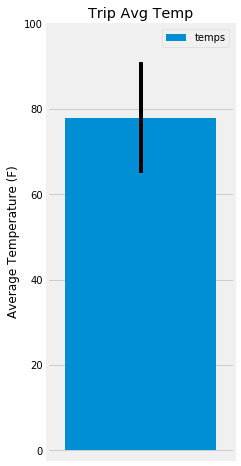

In [29]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
plt.figure(figsize=(3, 8))
plt.bar(1, calc_temps_df[1], yerr = terr, label="temps")
plt.tick_params(labelbottom = False)
plt.grid(b = None, axis = 'x') #remove horizontal grid lines
plt.title("Trip Avg Temp")
plt.ylabel("Average Temperature (F)")
plt.ylim(-2, 100)
plt.xlim(0.5, 1.5)
plt.legend(loc="best")
plt.savefig("avgtemp.png")
plt.show()

In [30]:

# trip_date = dt.datetime(2016, 9, 7) - dt.timedelta(days=14)
# total_rain = session.query(Measurement.station, Measurement.prcp, Measurement.date).\
#     filter(Measurement.date >= trip_date).order_by(func.count(Measurement.prcp).desc()).group_by(Measurement.station).all()
# for row in total_rain:
#     print(row)

In [31]:
# Calculate total rainfall per station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount
# List the station, name, latitude, longitude, and elevation

rainfall_df = pd.read_sql(
    """SELECT measurement.station, 
    measurement.prcp, 
    measurement.date,
    station.name,
    station.latitude, 
    station.longitude, 
    station.elevation
FROM measurement
JOIN station ON measurement.station = station.station
WHERE measurement.date >= '2016-08-25'
AND measurement.date <= '2016-09-07'
GROUP BY station.station
ORDER BY measurement.prcp DESC""", engine)

rainfall_df


,station,prcp,date,name,latitude,longitude,elevation
0,USC00519523,0.21,2016-08-25,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
1,USC00516128,0.11,2016-08-25,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4
2,USC00513117,0.08,2016-08-25,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
3,USC00519397,0.08,2016-08-25,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
4,USC00519281,0.06,2016-08-25,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
5,USC00514830,0.00,2016-08-25,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
6,USC00517948,0.00,2016-08-25,"PEARL CITY, HI US",21.39340,-157.97510,11.9


## Optional Challenge Assignment

In [32]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [33]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [34]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [35]:
# Plot the daily normals as an area plot with `stacked=False`
